In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/src/')
import _config

import pb_f_infer as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/data/
Device: cpu


In [5]:

preds = dict()
for i in range(0, 870 + 10, 10):
    df = pd.read_csv(f'/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/orthorep/out/_fitness_from_reads_pt/model_7/genotype_matrix_{i}.csv', index_col = 0)
    df['Abbrev genotype'] = df.index
#     df = df.rename(columns = idx_to_hr)
    preds[i] = df
    

## final only

In [3]:
def plot_trajectories(df, out_fn = '', title = ''):

    dfs = df
    
    melt_df = dfs.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    melt_df['Time'] = melt_df['Time'].astype(int)
    
    fig, ax = plt.subplots(figsize = (10, 6))

    gts = sorted(list(set(dfs['Abbrev genotype'])))
    colors = sns.color_palette('hls', int(len(gts) * 1.5))
    palette = {gt: color for gt, color in zip(gts, colors)}
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
        ax = ax,
    )
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
#     ax.get_legend().remove()
    
#     print(gts)
#     import matplotlib.patches as mpatches
#     patches = [mpatches.Patch(
#         color = palette[gt], 
#         label = gt,
#     ) for gt in gts]
#     print(len(patches))
#     plt.legend(handles = patches)

    plt.xticks(rotation = 90)
    plt.grid(alpha = 0.2)
    plt.ylim(bottom = 0, top = 100)
#     plt.xlim(left = 0, right = 528)
    sns.despine()
    
    if title != '':
        plt.title(title)
    
    plt.tight_layout()
    if out_fn != '':
        plt.savefig(out_fn)
    
    plt.show()
    plt.close()
    
    return

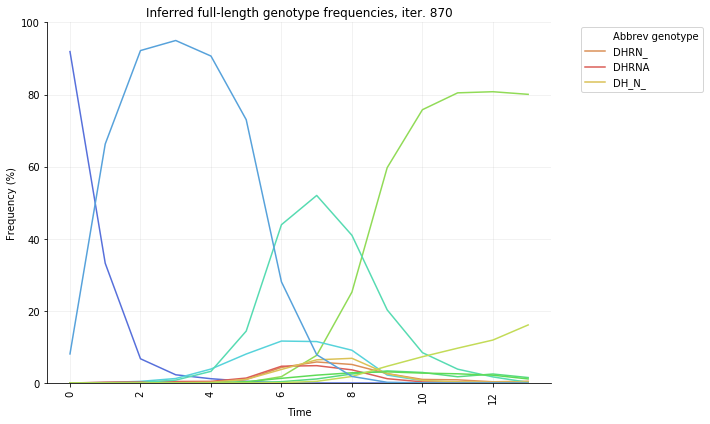

In [4]:
idx = 870
plot_trajectories(
    preds[idx], 
    out_fn = parent_script.out_dir + f'pred_{idx}.png',
    title = f'Inferred full-length genotype frequencies, iter. {idx}',
)